<a href="https://colab.research.google.com/github/Ifdha/Capstone-Project-GrowWell/blob/machine-learning/Capstone_Stunting_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Important Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Data Wrangling

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_balita.csv")

In [ ]:
data.head(100)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
95,0,laki-laki,51.837242,normal
96,0,laki-laki,47.559045,normal
97,0,laki-laki,42.531705,severely stunted
98,0,laki-laki,42.240741,severely stunted


In [ ]:
print(data[9000:9100])

      Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
9000             4     perempuan               51.8  severely stunted
9001             4     perempuan               61.3            normal
9002             4     perempuan               53.1  severely stunted
9003             4     perempuan               62.6            normal
9004             4     perempuan               56.2           stunted
...            ...           ...                ...               ...
9095             4     perempuan               58.7            normal
9096             4     perempuan               74.4            tinggi
9097             4     perempuan               69.1            tinggi
9098             4     perempuan               56.6           stunted
9099             4     perempuan               70.6            tinggi

[100 rows x 4 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
data.isna().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
data.duplicated().sum()

81574

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data["Umur (bulan)"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
data["Jenis Kelamin"].unique()

array(['laki-laki', 'perempuan'], dtype=object)

In [ ]:
data["Tinggi Badan (cm)"].unique()

array([ 44.59197329,  56.70520337,  46.8633576 , ..., 127.4       ,
       128.        , 127.6       ])

In [ ]:
data["Status Gizi"].unique()

array(['stunted', 'tinggi', 'normal', 'severely stunted'], dtype=object)

###Exploratory Data Analysis

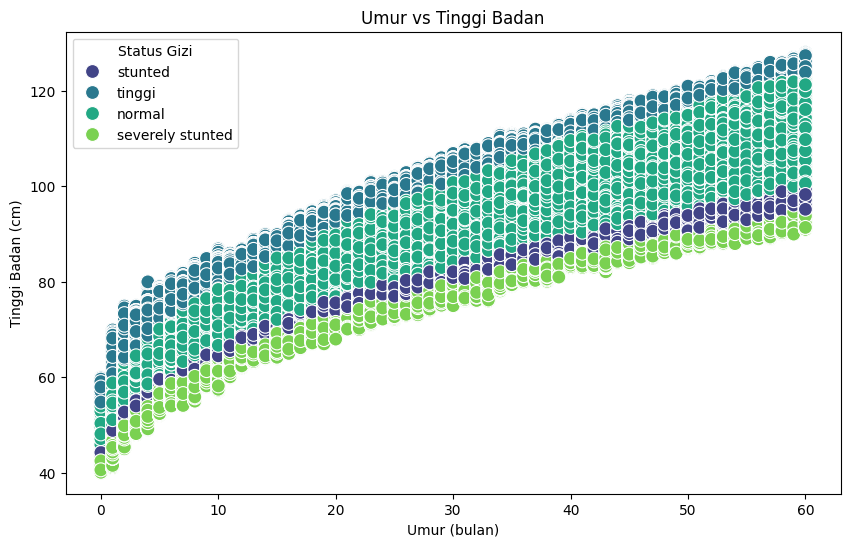

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi', palette='viridis', s=100)
plt.title('Umur vs Tinggi Badan')
plt.show()

<ipython-input-15-8cb94ad6b9a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Jenis Kelamin', palette='Set2')


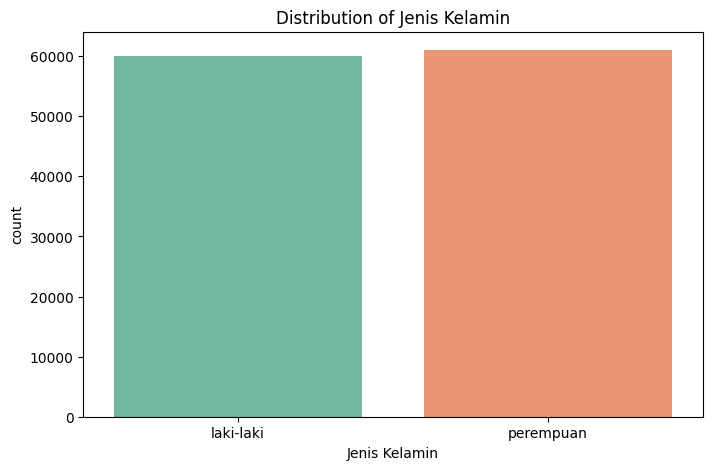

In [ ]:
# Bar plot for Jenis Kelamin
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Jenis Kelamin', palette='Set2')
plt.title('Distribution of Jenis Kelamin')
plt.show()

<ipython-input-16-3e8777144e44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Status Gizi', palette='coolwarm')


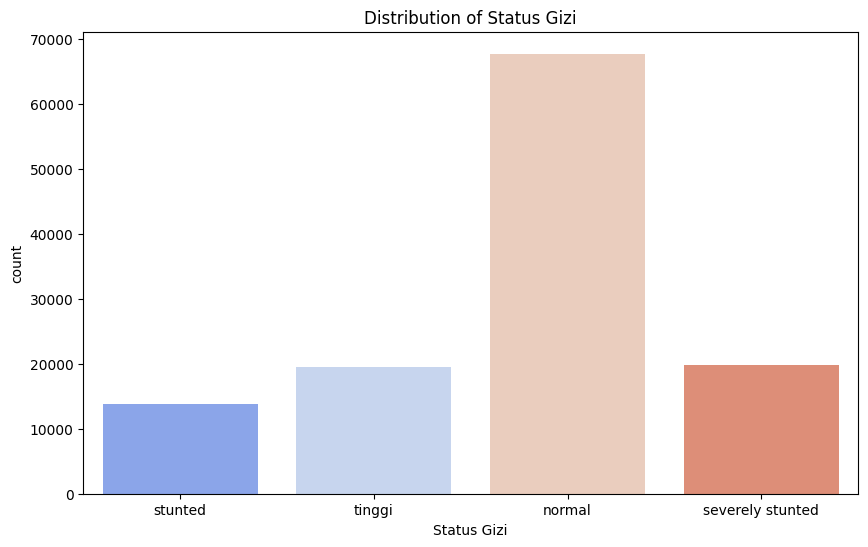

In [ ]:
# Bar plot for Status Gizi
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Status Gizi', palette='coolwarm')
plt.title('Distribution of Status Gizi')
plt.show()

In [ ]:
# Descriptive statistics
desc_stats = data[['Umur (bulan)', 'Tinggi Badan (cm)']].describe()
print(desc_stats)

        Umur (bulan)  Tinggi Badan (cm)
count  120999.000000      120999.000000
mean       30.173803          88.655434
std        17.575119          17.300997
min         0.000000          40.010437
25%        15.000000          77.000000
50%        30.000000          89.800000
75%        45.000000         101.200000
max        60.000000         128.000000


<ipython-input-18-f1a8fe63bc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Status Gizi', y='Tinggi Badan (cm)', palette='Set2')


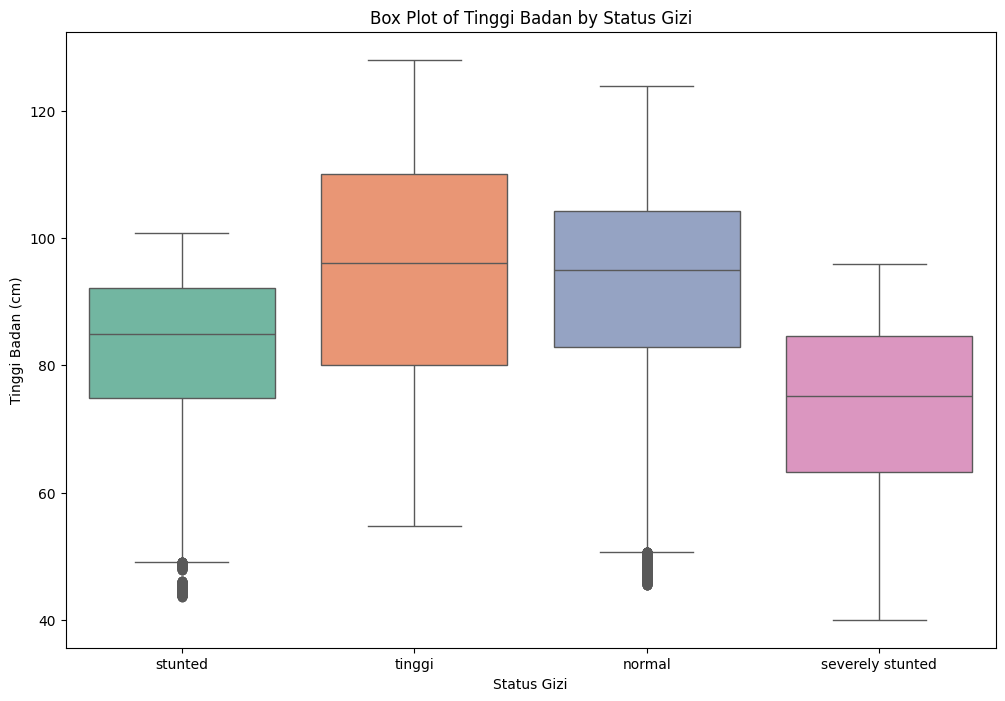

In [ ]:
 # Box plot for Tinggi Badan by Status Gizi
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Status Gizi', y='Tinggi Badan (cm)', palette='Set2')
plt.title('Box Plot of Tinggi Badan by Status Gizi')
plt.show()

###Make a Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Assuming your DataFrame is named data
# If not, replace data with your DataFrame name

# Encode categorical variables
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Status Gizi'] = label_encoder.fit_transform(data['Status Gizi'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13382
           1       1.00      1.00      1.00      4130
           2       1.00      1.00      1.00      2790
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200

[[13376     0     6     0]
 [    0  4129     1     0]
 [    1     4  2785     0]
 [    9     0     0  3889]]


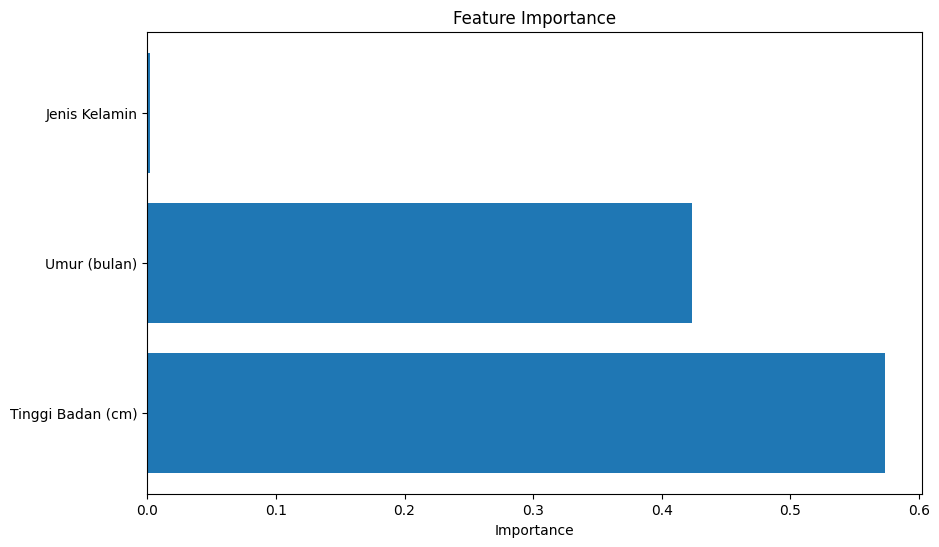

In [ ]:
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

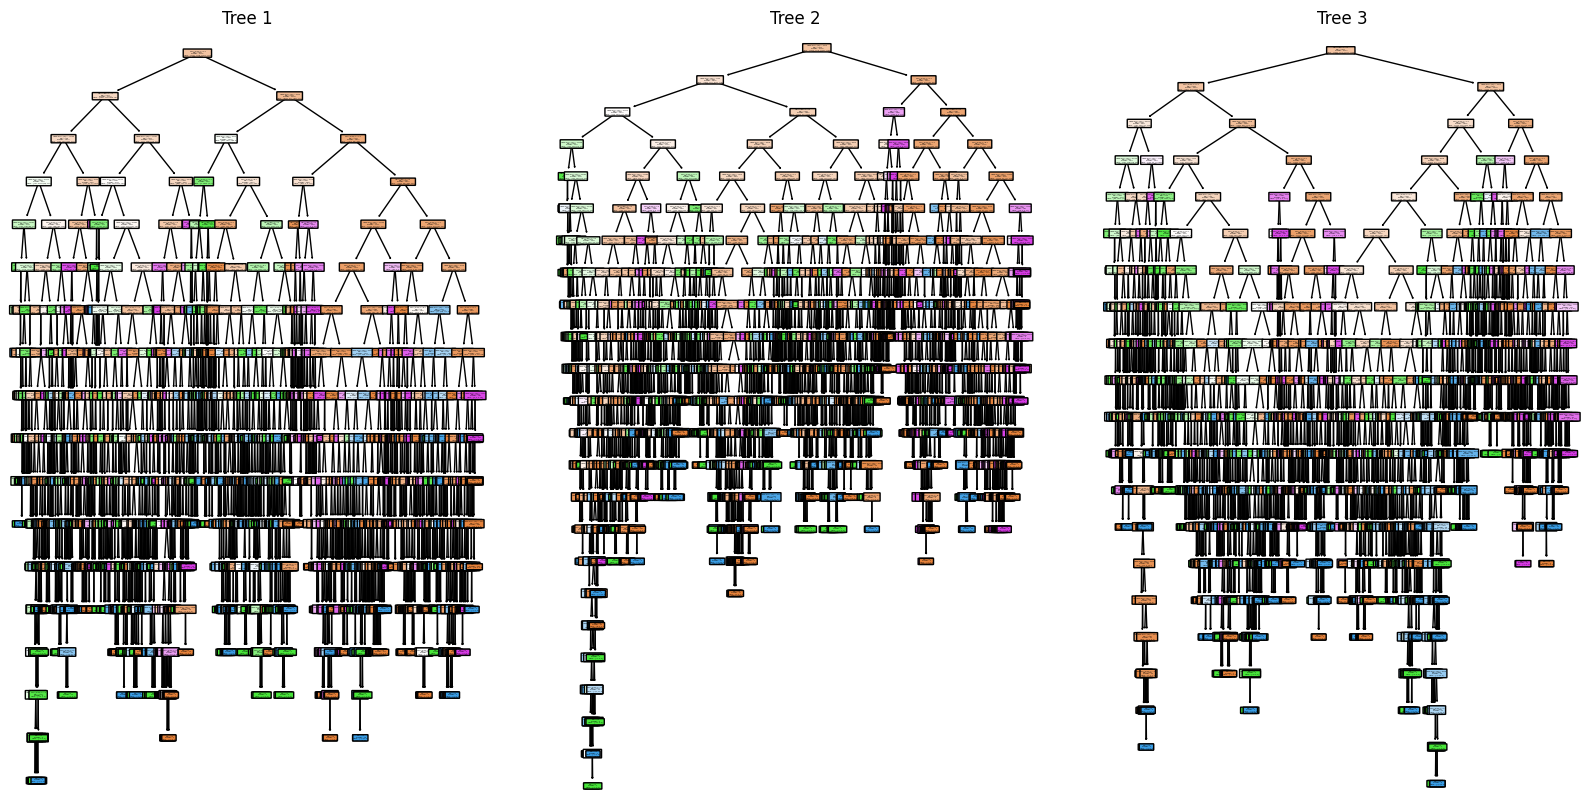

In [ ]:
from sklearn.tree import plot_tree
# Visualize the first few trees in the Random Forest
plt.figure(figsize=(20, 10))
for i in range(3):  # Adjust the number of trees to visualize as needed
    plt.subplot(1, 3, i + 1)
    plot_tree(model.estimators_[i], feature_names=feature_names, class_names=label_encoder.classes_, filled=True, rounded=True)
    plt.title(f'Tree {i + 1}')
plt.show()